In [42]:
!pip install gradio
!pip install kaggle

In [44]:
import pandas as pd

In [45]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [49]:
# verisetini indir
path = "/content"
!kaggle datasets download -d ziya07/forest-health-and-ecological-diversity -p $path

print("Path to dataset files:", path)

Dataset URL: https://www.kaggle.com/datasets/ziya07/forest-health-and-ecological-diversity
License(s): CC0-1.0
forest-health-and-ecological-diversity.zip: Skipping, found more recently modified local copy (use --force to force download)
Path to dataset files: /content


In [ ]:
!unzip "/content/forest-health-and-ecological-diversity.zip"

In [59]:
import pandas as pd
from google.colab import sheets

veri = pd.read_csv("/content/forest_health_data_with_target.csv")

sheet = sheets.InteractiveSheet(df=veri)

https://docs.google.com/spreadsheets/d/1JM1r58QaiT61MYyf0SaNNpBQvjRhAkRmodAhQiBxIs0#gid=0


In [126]:
import gradio as gr

with gr.Blocks() as demo:
    with gr.Row():
        health_status = gr.Dropdown(veri["Health_Status"].unique().tolist(), value=veri["Health_Status"].unique().tolist()[0], label="Health Status")
        max_height = gr.Slider(veri["Tree_Height"].min(), veri["Tree_Height"].max(), value=veri["Tree_Height"].max(), label="Max Tree Height")

    plt = gr.ScatterPlot(veri, x="Crown_Width_East_West", y="Tree_Height", inputs=[health_status, max_height])

    @gr.on(inputs=[health_status, max_height], outputs=plt)
    def filtered_data(health_status, max_height):
        filtered_veri = veri[veri["Tree_Height"] <= max_height]
        if health_status != veri["Health_Status"].unique().tolist()[0]:  # Assuming first element represents "All"
            filtered_veri = filtered_veri[filtered_veri["Health_Status"] == health_status]
        return filtered_veri

demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f0b0802a963a5e9d43.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [87]:
# Eksik değerlerin olduğu satırları bulma
print(veri.isnull().any(axis=1))

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [88]:
# Eksik değerlerin olduğu sütunları bulma
print(veri.isnull().any(axis=0))

Plot_ID                    False
Latitude                   False
Longitude                  False
DBH                        False
Tree_Height                False
Crown_Width_North_South    False
Crown_Width_East_West      False
Slope                      False
Elevation                  False
Temperature                False
Humidity                   False
Soil_TN                    False
Soil_TP                    False
Soil_AP                    False
Soil_AN                    False
Menhinick_Index            False
Gleason_Index              False
Disturbance_Level          False
Fire_Risk_Index            False
Health_Status              False
dtype: bool


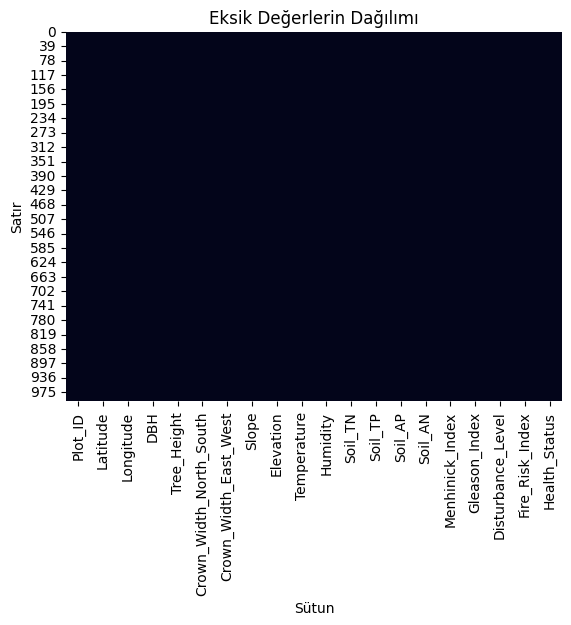

In [89]:
# Eksik değerlerin ısı haritası
sns.heatmap(veri.isnull(), cbar=False)
plt.ylabel('Satır')
plt.xlabel('Sütun')
plt.title('Eksik Değerlerin Dağılımı')
plt.show()

In [90]:
# Her sütündaki eksik değer sayısı
print(veri.isnull().sum())

Plot_ID                    0
Latitude                   0
Longitude                  0
DBH                        0
Tree_Height                0
Crown_Width_North_South    0
Crown_Width_East_West      0
Slope                      0
Elevation                  0
Temperature                0
Humidity                   0
Soil_TN                    0
Soil_TP                    0
Soil_AP                    0
Soil_AN                    0
Menhinick_Index            0
Gleason_Index              0
Disturbance_Level          0
Fire_Risk_Index            0
Health_Status              0
dtype: int64


In [60]:
# Verinin ilk 5 satırını gösterir
veri.head()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy


In [61]:
# özet istatistik tablosu
veri.describe()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,29.610262,-94.508789,52.728544,15.730501,5.446948,5.486180,22.198898,1498.874791,22.027384,59.743599,0.510635,0.255100,0.251220,0.249344,1.762232,2.963965,0.512124,0.509207
std,288.819436,11.685494,20.453293,27.614049,8.021702,2.581289,2.602753,13.038014,826.251755,9.878208,22.572259,0.283588,0.146605,0.142471,0.145486,0.724376,1.163286,0.287952,0.281458
min,1.000000,10.185281,-129.774722,5.001105,2.018295,1.000276,1.055654,0.064275,100.698914,5.008503,20.004226,0.010934,0.005078,0.005596,0.005660,0.503300,1.001239,0.000252,0.000854
25%,250.750000,19.438931,-113.124801,29.828343,8.773222,3.204766,3.244420,10.809975,784.368948,13.728430,41.131530,0.260105,0.130452,0.127690,0.121242,1.136698,1.947451,0.270524,0.277123
50%,500.500000,29.872295,-93.688627,52.558322,15.559820,5.451383,5.413625,21.808936,1503.573023,21.754533,59.614944,0.511302,0.249754,0.247471,0.243803,1.752412,2.969374,0.523023,0.516489
75%,750.250000,39.772784,-76.767446,77.114835,22.651143,7.659941,7.658666,34.040896,2171.952127,30.056674,78.897379,0.759135,0.387961,0.377836,0.377283,2.421229,3.987144,0.750194,0.746163
max,1000.000000,49.988707,-60.041039,99.792981,29.987616,9.979745,9.994153,44.975731,2996.823629,39.860447,99.960415,0.999676,0.499671,0.499356,0.499428,2.999513,4.999699,0.999150,0.997163


In [63]:
# Sütundaki değerlerin ortalaması
veri.Crown_Width_East_West.mean()

5.486180402697188

In [84]:
# Python major.minor.micro
from sys import version_info
version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [65]:
nt=pd.Series(veri.Crown_Width_East_West)
nt

,Crown_Width_East_West
0,4.542720
1,5.260921
2,8.690927
3,4.060039
4,8.826847
...,...
995,7.159918
996,5.528984
997,7.886340
998,5.367616


In [66]:
nt<5

,Crown_Width_East_West
0,True
1,False
2,False
3,True
4,False
...,...
995,False
996,False
997,False
998,False


In [67]:
nt.isnull()

,Crown_Width_East_West
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [73]:
veri.isnull().sum()

,0
Plot_ID,0
Latitude,0
Longitude,0
DBH,0
Tree_Height,0
Crown_Width_North_South,0
Crown_Width_East_West,0
Slope,0
Elevation,0
Temperature,0


In [69]:
veri.interpolate()

<ipython-input-69-093df261039f>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  veri.interpolate()


,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,13.663283,-84.013139,87.203097,14.378997,9.076576,7.159918,26.088170,892.162899,23.022532,88.612479,0.365851,0.007299,0.470416,0.215047,2.127209,1.030366,0.317082,0.621856,Unhealthy
996,997,46.692543,-63.036977,19.940955,11.363233,2.074429,5.528984,30.016659,707.605751,10.787965,91.800707,0.927440,0.437466,0.347990,0.458267,0.944496,3.290682,0.536056,0.760532,Healthy
997,998,15.472745,-125.172939,34.429847,13.048025,3.950586,7.886340,41.020960,1420.453374,39.219948,95.736633,0.701670,0.157126,0.434471,0.251479,0.628099,3.868748,0.661191,0.725692,Healthy
998,999,48.009494,-126.006170,32.554326,16.838336,8.341708,5.367616,15.552908,2734.468889,8.777359,51.799039,0.264605,0.469601,0.186396,0.202424,2.207404,3.980321,0.703485,0.692031,Very Healthy


In [86]:
df_sorted = veri.sort_values( by ='Slope')
df_sorted.head()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
754,755,15.570883,-61.688837,92.161155,9.605729,8.753011,9.191765,0.064275,816.897614,38.524236,37.731785,0.162535,0.202653,0.330045,0.100413,1.599552,4.637908,0.681905,0.117764,Sub-healthy
897,898,45.853433,-116.838269,31.834881,25.322032,3.681795,4.018661,0.164534,1522.317785,25.250487,74.385450,0.223779,0.448381,0.437629,0.065756,0.900321,4.563248,0.362056,0.872110,Very Healthy
737,738,42.663978,-116.376424,56.725822,23.032960,4.139487,3.394912,0.172363,705.090548,7.799387,21.468458,0.491545,0.323976,0.296379,0.414796,2.720201,4.004132,0.545474,0.451191,Very Healthy
122,123,22.720139,-69.651067,96.877028,3.750736,7.280495,1.506019,0.176327,1648.704728,9.127854,72.595546,0.891760,0.188677,0.299509,0.037876,2.115026,3.054088,0.236172,0.169820,Healthy
571,572,41.346121,-118.239005,91.080545,17.064636,7.074039,1.587491,0.263913,1672.669929,18.571751,28.191557,0.846965,0.224605,0.406647,0.019741,2.853528,3.282211,0.182774,0.989935,Healthy


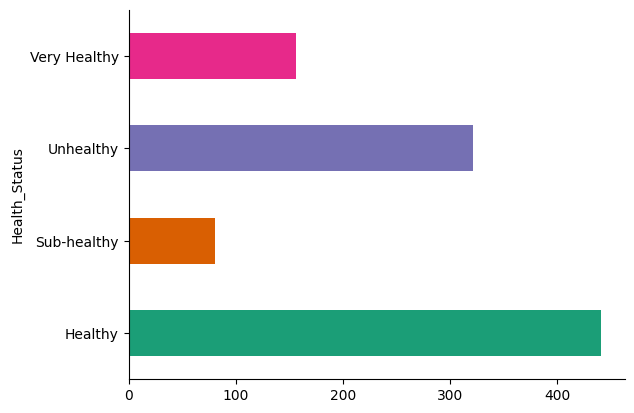

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns
veri.groupby('Health_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [92]:
veri.columns

Index(['Plot_ID', 'Latitude', 'Longitude', 'DBH', 'Tree_Height',
       'Crown_Width_North_South', 'Crown_Width_East_West', 'Slope',
       'Elevation', 'Temperature', 'Humidity', 'Soil_TN', 'Soil_TP', 'Soil_AP',
       'Soil_AN', 'Menhinick_Index', 'Gleason_Index', 'Disturbance_Level',
       'Fire_Risk_Index', 'Health_Status'],
      dtype='object')

In [94]:
veri.index

RangeIndex(start=0, stop=1000, step=1)

In [95]:
veri.iloc[1]

,1
Plot_ID,2
Latitude,48.028572
Longitude,-92.066934
DBH,28.462986
Tree_Height,24.307079
Crown_Width_North_South,8.248891
Crown_Width_East_West,5.260921
Slope,7.757386
Elevation,641.640332
Temperature,29.054905


In [98]:
veri[veri['Latitude'] > 16]

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,33.609227,-120.525214,42.672600,3.436228,6.836181,5.490711,3.752057,1013.039351,21.679878,85.499039,0.485464,0.023703,0.059587,0.183815,1.496572,3.286729,0.092912,0.545253,Healthy
994,995,24.438956,-77.403744,17.512928,15.790991,1.615966,1.649919,41.782849,438.731912,15.362293,29.969137,0.871707,0.488928,0.194837,0.431699,2.395764,4.751151,0.377498,0.727826,Very Healthy
996,997,46.692543,-63.036977,19.940955,11.363233,2.074429,5.528984,30.016659,707.605751,10.787965,91.800707,0.927440,0.437466,0.347990,0.458267,0.944496,3.290682,0.536056,0.760532,Healthy
998,999,48.009494,-126.006170,32.554326,16.838336,8.341708,5.367616,15.552908,2734.468889,8.777359,51.799039,0.264605,0.469601,0.186396,0.202424,2.207404,3.980321,0.703485,0.692031,Very Healthy


In [99]:
veri.at[0, 'DBH'] = None

In [102]:
import numpy as np
veri.at[1, 'Tree_Height'] = np.nan

In [103]:
veri.sort_values(by='Tree_Height', ascending=False)

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
649,650,29.937688,-80.387871,48.481462,29.987616,2.519726,6.226804,38.654125,1816.242932,12.480784,36.049310,0.682600,0.408322,0.458938,0.342489,1.865698,1.573184,0.325667,0.994850,Healthy
402,403,30.210095,-127.433000,43.914745,29.968993,3.212627,9.623243,9.158000,1759.982405,25.416652,64.791448,0.167264,0.441193,0.208558,0.185876,0.657688,4.379161,0.430393,0.065777,Very Healthy
407,408,10.433506,-73.603089,25.699793,29.933592,2.283009,4.990952,14.156444,2914.937281,13.452718,62.784078,0.594684,0.292648,0.112542,0.441992,2.031671,2.138622,0.199242,0.489690,Healthy
502,503,22.381105,-128.205055,59.485250,29.922661,3.593661,3.095727,21.350393,462.757839,14.822245,64.547553,0.741733,0.339736,0.097470,0.086287,0.624418,2.457473,0.612047,0.920738,Healthy
301,302,31.254185,-64.465143,59.344621,29.921106,9.456117,1.094619,19.919468,1347.917641,14.066230,59.604476,0.822421,0.102847,0.296805,0.110657,2.124477,2.915331,0.631014,0.547378,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,34.965956,-60.256596,74.287755,2.178613,5.811033,7.393796,9.025410,1658.731886,35.536199,27.756170,0.210438,0.105561,0.498093,0.292208,2.348878,4.158798,0.941689,0.609812,Unhealthy
317,318,16.931773,-78.788733,42.484727,2.148777,1.362570,9.629847,25.973400,1999.230657,31.136016,49.591090,0.231259,0.230205,0.098146,0.242418,0.622104,1.932589,0.729038,0.608491,Sub-healthy
217,218,39.859656,-82.365049,31.744514,2.055780,5.483169,7.681329,16.494803,2172.636718,15.967869,92.863594,0.321906,0.335627,0.342827,0.334213,0.891270,1.390440,0.716662,0.862051,Unhealthy
626,627,28.501389,-115.934642,13.482505,2.018295,3.984552,4.942397,36.352415,2680.093496,14.695891,67.628458,0.839778,0.381476,0.182587,0.251137,1.331909,3.434922,0.491794,0.644964,Healthy


In [104]:
veri.sort_values(by='Tree_Height', ascending=True, inplace=True)

In [105]:
veri.sort_index(ascending=False)

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
999,1000,27.840231,-110.246905,87.784333,6.518286,6.375811,2.344435,27.967829,402.992919,37.618045,37.371232,0.568444,0.161888,0.026391,0.376443,1.127698,4.619908,0.136755,0.821540,Healthy
998,999,48.009494,-126.006170,32.554326,16.838336,8.341708,5.367616,15.552908,2734.468889,8.777359,51.799039,0.264605,0.469601,0.186396,0.202424,2.207404,3.980321,0.703485,0.692031,Very Healthy
997,998,15.472745,-125.172939,34.429847,13.048025,3.950586,7.886340,41.020960,1420.453374,39.219948,95.736633,0.701670,0.157126,0.434471,0.251479,0.628099,3.868748,0.661191,0.725692,Healthy
996,997,46.692543,-63.036977,19.940955,11.363233,2.074429,5.528984,30.016659,707.605751,10.787965,91.800707,0.927440,0.437466,0.347990,0.458267,0.944496,3.290682,0.536056,0.760532,Healthy
995,996,13.663283,-84.013139,87.203097,14.378997,9.076576,7.159918,26.088170,892.162899,23.022532,88.612479,0.365851,0.007299,0.470416,0.215047,2.127209,1.030366,0.317082,0.621856,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
1,2,48.028572,-92.066934,28.462986,NaN,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy


In [106]:
veri.sort_index(ascending=False)

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
999,1000,27.840231,-110.246905,87.784333,6.518286,6.375811,2.344435,27.967829,402.992919,37.618045,37.371232,0.568444,0.161888,0.026391,0.376443,1.127698,4.619908,0.136755,0.821540,Healthy
998,999,48.009494,-126.006170,32.554326,16.838336,8.341708,5.367616,15.552908,2734.468889,8.777359,51.799039,0.264605,0.469601,0.186396,0.202424,2.207404,3.980321,0.703485,0.692031,Very Healthy
997,998,15.472745,-125.172939,34.429847,13.048025,3.950586,7.886340,41.020960,1420.453374,39.219948,95.736633,0.701670,0.157126,0.434471,0.251479,0.628099,3.868748,0.661191,0.725692,Healthy
996,997,46.692543,-63.036977,19.940955,11.363233,2.074429,5.528984,30.016659,707.605751,10.787965,91.800707,0.927440,0.437466,0.347990,0.458267,0.944496,3.290682,0.536056,0.760532,Healthy
995,996,13.663283,-84.013139,87.203097,14.378997,9.076576,7.159918,26.088170,892.162899,23.022532,88.612479,0.365851,0.007299,0.470416,0.215047,2.127209,1.030366,0.317082,0.621856,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
1,2,48.028572,-92.066934,28.462986,NaN,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy


In [108]:
veri.nlargest(5, 'Tree_Height')

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
649,650,29.937688,-80.387871,48.481462,29.987616,2.519726,6.226804,38.654125,1816.242932,12.480784,36.049310,0.682600,0.408322,0.458938,0.342489,1.865698,1.573184,0.325667,0.994850,Healthy
402,403,30.210095,-127.433000,43.914745,29.968993,3.212627,9.623243,9.158000,1759.982405,25.416652,64.791448,0.167264,0.441193,0.208558,0.185876,0.657688,4.379161,0.430393,0.065777,Very Healthy
407,408,10.433506,-73.603089,25.699793,29.933592,2.283009,4.990952,14.156444,2914.937281,13.452718,62.784078,0.594684,0.292648,0.112542,0.441992,2.031671,2.138622,0.199242,0.489690,Healthy
502,503,22.381105,-128.205055,59.485250,29.922661,3.593661,3.095727,21.350393,462.757839,14.822245,64.547553,0.741733,0.339736,0.097470,0.086287,0.624418,2.457473,0.612047,0.920738,Healthy
301,302,31.254185,-64.465143,59.344621,29.921106,9.456117,1.094619,19.919468,1347.917641,14.066230,59.604476,0.822421,0.102847,0.296805,0.110657,2.124477,2.915331,0.631014,0.547378,Healthy


In [110]:
veri.nsmallest(3, "Slope")

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
754,755,15.570883,-61.688837,92.161155,9.605729,8.753011,9.191765,0.064275,816.897614,38.524236,37.731785,0.162535,0.202653,0.330045,0.100413,1.599552,4.637908,0.681905,0.117764,Sub-healthy
897,898,45.853433,-116.838269,31.834881,25.322032,3.681795,4.018661,0.164534,1522.317785,25.250487,74.385450,0.223779,0.448381,0.437629,0.065756,0.900321,4.563248,0.362056,0.872110,Very Healthy
737,738,42.663978,-116.376424,56.725822,23.032960,4.139487,3.394912,0.172363,705.090548,7.799387,21.468458,0.491545,0.323976,0.296379,0.414796,2.720201,4.004132,0.545474,0.451191,Very Healthy


In [111]:
veri.reset_index(drop=True)

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,627,28.501389,-115.934642,13.482505,2.018295,3.984552,4.942397,36.352415,2680.093496,14.695891,67.628458,0.839778,0.381476,0.182587,0.251137,1.331909,3.434922,0.491794,0.644964,Healthy
1,218,39.859656,-82.365049,31.744514,2.055780,5.483169,7.681329,16.494803,2172.636718,15.967869,92.863594,0.321906,0.335627,0.342827,0.334213,0.891270,1.390440,0.716662,0.862051,Unhealthy
2,318,16.931773,-78.788733,42.484727,2.148777,1.362570,9.629847,25.973400,1999.230657,31.136016,49.591090,0.231259,0.230205,0.098146,0.242418,0.622104,1.932589,0.729038,0.608491,Sub-healthy
3,913,34.965956,-60.256596,74.287755,2.178613,5.811033,7.393796,9.025410,1658.731886,35.536199,27.756170,0.210438,0.105561,0.498093,0.292208,2.348878,4.158798,0.941689,0.609812,Unhealthy
4,745,19.288508,-100.869220,64.129296,2.192583,3.094555,2.472546,21.469942,1443.833926,23.079128,41.229579,0.457031,0.407956,0.447882,0.051991,0.783496,2.886330,0.218247,0.354627,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,503,22.381105,-128.205055,59.485250,29.922661,3.593661,3.095727,21.350393,462.757839,14.822245,64.547553,0.741733,0.339736,0.097470,0.086287,0.624418,2.457473,0.612047,0.920738,Healthy
996,408,10.433506,-73.603089,25.699793,29.933592,2.283009,4.990952,14.156444,2914.937281,13.452718,62.784078,0.594684,0.292648,0.112542,0.441992,2.031671,2.138622,0.199242,0.489690,Healthy
997,403,30.210095,-127.433000,43.914745,29.968993,3.212627,9.623243,9.158000,1759.982405,25.416652,64.791448,0.167264,0.441193,0.208558,0.185876,0.657688,4.379161,0.430393,0.065777,Very Healthy
998,650,29.937688,-80.387871,48.481462,29.987616,2.519726,6.226804,38.654125,1816.242932,12.480784,36.049310,0.682600,0.408322,0.458938,0.342489,1.865698,1.573184,0.325667,0.994850,Healthy


In [112]:
veri['Humidity'].std()

22.572258620899095

In [118]:
filtered_veri = veri[veri['Latitude'].isin(veri['Latitude'].unique())]

filtered_veri = filtered_veri.reset_index(drop=True)
filtered_veri

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,627,28.501389,-115.934642,13.482505,2.018295,3.984552,4.942397,36.352415,2680.093496,14.695891,67.628458,0.839778,0.381476,0.182587,0.251137,1.331909,3.434922,0.491794,0.644964,Healthy
1,218,39.859656,-82.365049,31.744514,2.055780,5.483169,7.681329,16.494803,2172.636718,15.967869,92.863594,0.321906,0.335627,0.342827,0.334213,0.891270,1.390440,0.716662,0.862051,Unhealthy
2,318,16.931773,-78.788733,42.484727,2.148777,1.362570,9.629847,25.973400,1999.230657,31.136016,49.591090,0.231259,0.230205,0.098146,0.242418,0.622104,1.932589,0.729038,0.608491,Sub-healthy
3,913,34.965956,-60.256596,74.287755,2.178613,5.811033,7.393796,9.025410,1658.731886,35.536199,27.756170,0.210438,0.105561,0.498093,0.292208,2.348878,4.158798,0.941689,0.609812,Unhealthy
4,745,19.288508,-100.869220,64.129296,2.192583,3.094555,2.472546,21.469942,1443.833926,23.079128,41.229579,0.457031,0.407956,0.447882,0.051991,0.783496,2.886330,0.218247,0.354627,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,503,22.381105,-128.205055,59.485250,29.922661,3.593661,3.095727,21.350393,462.757839,14.822245,64.547553,0.741733,0.339736,0.097470,0.086287,0.624418,2.457473,0.612047,0.920738,Healthy
996,408,10.433506,-73.603089,25.699793,29.933592,2.283009,4.990952,14.156444,2914.937281,13.452718,62.784078,0.594684,0.292648,0.112542,0.441992,2.031671,2.138622,0.199242,0.489690,Healthy
997,403,30.210095,-127.433000,43.914745,29.968993,3.212627,9.623243,9.158000,1759.982405,25.416652,64.791448,0.167264,0.441193,0.208558,0.185876,0.657688,4.379161,0.430393,0.065777,Very Healthy
998,650,29.937688,-80.387871,48.481462,29.987616,2.519726,6.226804,38.654125,1816.242932,12.480784,36.049310,0.682600,0.408322,0.458938,0.342489,1.865698,1.573184,0.325667,0.994850,Healthy


In [119]:
veri.groupby('Health_Status').mean()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index
Health_Status,,,,,,,,,,,,,,,,,,,
Healthy,492.662132,29.081198,-93.945834,54.432687,15.042557,5.510184,5.540056,22.600013,1492.540831,22.141913,59.292630,0.510624,0.259175,0.259352,0.241091,1.802891,2.904312,0.368956,0.506112
Sub-healthy,505.259259,29.856470,-97.873604,51.320196,6.271485,5.408731,4.965672,24.491850,1423.989715,22.335482,62.095706,0.531810,0.256984,0.243178,0.252752,1.811805,3.323447,0.649887,0.506595
Unhealthy,502.260870,29.061683,-94.385632,52.120742,15.565540,5.389909,5.513419,21.305092,1531.182696,22.150671,59.176255,0.509724,0.257443,0.252589,0.264532,1.718202,2.341725,0.718776,0.525586
Very Healthy,516.551282,32.110370,-94.607312,50.054391,22.918272,5.405763,5.547919,21.719312,1488.976216,21.289170,60.968222,0.501552,0.237763,0.229582,0.239555,1.712435,4.230313,0.418766,0.485503


In [120]:
veri.groupby('Health_Status').apply(lambda x: x.sort_values('Tree_Height', ascending=False))

<ipython-input-120-5f629d485ada>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  veri.groupby('Health_Status').apply(lambda x: x.sort_values('Tree_Height', ascending=False))


Plot_ID   Latitude   Longitude        DBH  Tree_Height  \
Health_Status                                                               
Healthy       649      650  29.937688  -80.387871  48.481462    29.987616   
              407      408  10.433506  -73.603089  25.699793    29.933592   
              502      503  22.381105 -128.205055  59.485250    29.922661   
              301      302  31.254185  -64.465143  59.344621    29.921106   
              395      396  47.230293  -71.978164  37.858359    29.892415   
...                    ...        ...         ...        ...          ...   
Very Healthy  580      581  28.365430 -113.763703  16.677464    15.529064   
              51        52  41.005313  -92.974401  51.046147    15.525112   
              344      345  25.940189  -78.010544  94.463943    15.269794   
              521      522  25.235634  -64.589478  17.771337    15.135002   
              1          2  48.028572  -92.066934  28.462986          NaN   

                   Crown_Width_North_South  Crown_Width_East_West      Slope  \
Health_Status                                                                  
Healthy       649                 2.519726               6.226804  38.654125   
              407                 2.283009               4.990952  14.156444   
              502                 3.593661               3.095727  21.350393   
              301                 9.456117               1.094619  19.919468   
              395                 8.579488               4.348392  12.505101   
...                                    ...                    ...        ...   
Very Healthy  580                 9.410895               1.359532  39.676904   
              51                  7.201789               8.246570  42.762565   
              344                 6.292004               9.646717  18.796886   
              521                 6.194054               6.196181   9.530917   
              1                   8.248891               5.260921   7.757386   

                     Elevation  Temperature   Humidity   Soil_TN   Soil_TP  \
Health_Status                                                                
Healthy       649  1816.242932    12.480784  36.049310  0.682600  0.408322   
              407  2914.937281    13.452718  62.784078  0.594684  0.292648   
              502   462.757839    14.822245  64.547553  0.741733  0.339736   
              301  1347.917641    14.066230  59.604476  0.822421  0.102847   
              395   278.663157    29.643653  20.648656  0.748048  0.130673   
...                        ...          ...        ...       ...       ...   
Very Healthy  580  2048.159884    14.449077  41.940948  0.415740  0.058941   
              51   1629.039935    11.148530  63.770211  0.465605  0.071024   
              344  1586.471026    38.882538  24.663776  0.906027  0.184749   
              521  1566.846746    19.853616  68.831509  0.682114  0.013850   
              1     641.640332    29.054905  62.028839  0.339583  0.073260   

                    Soil_AP   Soil_AN  Menhinick_Index  Gleason_Index  \
Health_Status                                                           
Healthy       649  0.458938  0.342489         1.865698       1.573184   
              407  0.112542  0.441992         2.031671       2.138622   
              502  0.097470  0.086287         0.624418       2.457473   
              301  0.296805  0.110657         2.124477       2.915331   
              395  0.183258  0.092424         1.816723       2.709975   
...                     ...       ...              ...            ...   
Very Healthy  580  0.401951  0.081104         1.704861       4.769045   
              51   0.168259  0.206631         1.461022       4.103446   
              344  0.236165  0.284895         2.967027       3.879321   
              521  0.421894  0.125468         2.854776       4.958892   
              1    0.044616  0.013501         0.723696       3.986987   

           

In [121]:
veri.groupby('Health_Status')["Latitude"].sum()

,Latitude
Health_Status,
Healthy,12824.808285
Sub-healthy,2418.374092
Unhealthy,9357.862070
Very Healthy,5009.217686
